<a href="https://colab.research.google.com/github/Mariagltm/MedicalConditions/blob/main/Project_DSF_39_Medical_Conditions_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Conditions Data**
**Final Project - Digital Skill Fair 39.0 (Data Science)**

*Maria Putri Fredella Gultom*

The following steps:
1. Getting an initial overview of the dataset through functions such as head(), tail(), sample(), and info() to understand its structure and contents.
2. Generating descriptive statistics with describe () to identify key patterns in the numerical data.
3. Checking for duplicate entries and determining how to handle.
4. Identifying for null or missing data, evaluating their extent, and implementing strategis to manage them effectively.





In [ ]:
!pip install graphviz

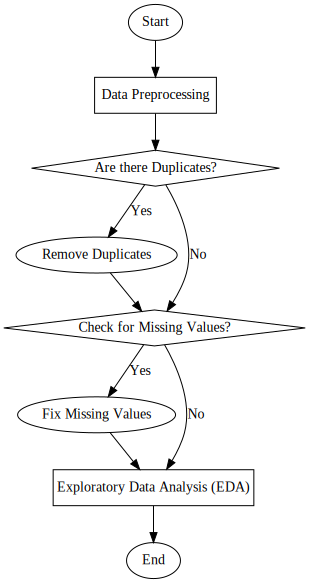

In [ ]:
from graphviz import Digraph

dot = Digraph()

# Main stages
dot.node('A', 'Start', shape='oval')
dot.node('B', 'Data Preprocessing', shape='box')
dot.node('C1', 'Are there Duplicates?', shape='diamond')
dot.node('C2', 'Remove Duplicates', shape='ellipse')
dot.node('D1', 'Check for Missing Values?', shape='diamond')
dot.node('D2', 'Fix Missing Values', shape='ellipse')
dot.node('E', 'Exploratory Data Analysis (EDA)', shape='box')
dot.node('M', 'End', shape='oval')

# Flow
dot.edge('A', 'B')
dot.edge('B', 'C1')
dot.edge('C1', 'C2', label='Yes')
dot.edge('C1', 'D1', label='No')
dot.edge('C2', 'D1')
dot.edge('D1', 'D2', label='Yes')
dot.edge('D1', 'E', label='No')
dot.edge('D2', 'E')
dot.edge('E', 'M')

# Render the flowchart in the notebook
dot.render('medical_pipeline_flowchart', format='jpeg', cleanup=False)
dot

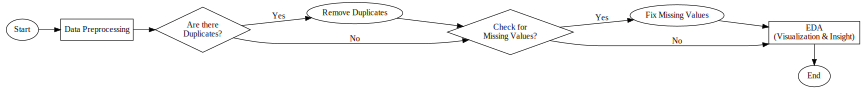

In [ ]:
from graphviz import Digraph

dot = Digraph(engine='dot', graph_attr={'rankdir': 'LR', 'size' : '12'})

# Main
dot.node('A', 'Start', shape='oval')
dot.node('B', 'Data Preprocessing', shape='box')
dot.node('C1', 'Are there\nDuplicates?', shape='diamond')
dot.node('C2', 'Remove Duplicates', shape='ellipse')
dot.node('D1', 'Check for\nMissing Values?', shape='diamond')
dot.node('D2', 'Fix Missing Values', shape='ellipse')
dot.node('E', 'EDA\n(Visualization & Insight)', shape='box')
dot.node('M', 'End', shape='oval')

with dot.subgraph() as s:
  s.attr(rank='same')
  s.node('E')
  s.node('M')

# Flow
dot.edge('A', 'B')
dot.edge('B', 'C1')
dot.edge('C1', 'C2', label='Yes', minlen='2')
dot.edge('C1', 'D1', label='No')
dot.edge('C2', 'D1', minlen='2')
dot.edge('D1', 'D2', label='Yes', minlen='2')
dot.edge('D1', 'E', label='No')
dot.edge('D2', 'E', minlen='2')
dot.edge('E', 'M')

# Render in notebook
dot.render('medical_flow_vertical_step', format='jpeg', cleanup=False)
dot

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

`numpy` is used for numerical computations, especially arrays and matrices.

`pandas` is used for provides data structures and functions for data manipulation and analysis.

`seaborn` is a statical data visualization library to generate complex with less code.

`matplotlib.pyplot` is used for creating static, animated, and interactive plots.

`pd.set_option()` is configuring Pandas display settings, used to show all columns and rows of a DataFrame.



# Load Data

Source :
https://www.kaggle.com/datasets/marius2303/medical-condition-prediction-dataset

In [ ]:
# import data
import pandas as pd
df = pd.read_excel('MedicalConditionsDataset.xlsx')
data = df.copy()

In [ ]:
df

,id,full_name,age,gender,smoking_status,glucose_levels,condition
0,1,User0001,21.0,male,0,1.234568e+15,Pneumonia
1,2,User0002,30.0,male,0,7.234467e+15,Diabetic
2,3,User0003,18.0,male,0,9.876543e+15,Pneumonia
3,4,User0004,20.0,male,0,4.890123e+15,Pneumonia
4,5,User0005,76.0,male,0,1.321099e+15,Diabetic
5,6,User0006,40.0,male,0,9.765432e+15,Diabetic
6,7,User0007,49.0,male,1,1.531511e+16,Cancer
7,8,User0008,47.0,male,0,1.993397e+15,Diabetic
8,9,User0009,34.0,male,0,NaN,Diabetic
9,10,User0010,65.0,male,1,NaN,Diabetic


# Preliminary

In [ ]:
# showing top 5 rows of the data
data.head()

,id,full_name,age,gender,smoking_status,glucose_levels,condition
0,1,User0001,21.0,male,0,1.234568e+15,Pneumonia
1,2,User0002,30.0,male,0,7.234467e+15,Diabetic
2,3,User0003,18.0,male,0,9.876543e+15,Pneumonia
3,4,User0004,20.0,male,0,4.890123e+15,Pneumonia
4,5,User0005,76.0,male,0,1.321099e+15,Diabetic


In [ ]:
data.tail()

,id,full_name,age,gender,smoking_status,glucose_levels,condition
2015,2016,User2146,21.0,male,0,8.901235e+15,Diabetic
2016,2017,User2147,33.0,male,0,2.765432e+15,Pneumonia
2017,2018,User2148,20.0,male,0,9.901235e+15,Diabetic
2018,2019,User2149,47.0,male,0,5.543211e+15,Diabetic
2019,2020,User2150,19.0,male,0,2.109877e+15,Diabetic


In [ ]:
# sample 5 rows of the data
data.sample(5)

,id,full_name,age,gender,smoking_status,glucose_levels,condition
1031,1032,User1032,28.0,male,0,6.987654e+15,Diabetic
297,298,User0298,39.0,female,0,NaN,Pneumonia
1134,1135,User1180,87.0,male,0,4.109877e+15,Pneumonia
1939,1940,User2070,29.0,male,0,NaN,Diabetic
2005,2006,User2136,24.0,male,0,NaN,Diabetic


Review :
1. All columns are clearly labeled and appropriately typed
2. `id` : unique identifier for each user (integer)
3. `age` : age of the user (numeric with decimal values)
4. `gender` : the gender of user (categorical)
5. `smoking_status` : indicates the smoking status of the user (categorical)
6. `glucose_levels` : blood glucose levels of the user (numeric)
7. `condition` : the target label indicating the medical condition of the user (text)
8. No obvious effect on the data (column name vs its entries), all looks good

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2020 non-null   int64  
 1   full_name       2020 non-null   object 
 2   age             1639 non-null   float64
 3   gender          2020 non-null   object 
 4   smoking_status  2020 non-null   int64  
 5   glucose_levels  1519 non-null   float64
 6   condition       2020 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 110.6+ KB


Review :
1. Data contains 7 columns and 2020 rows.
2. `age`,`glucose_levels` column have missing values.
3. Most data types appear appropriate, but the `gender` column will be converted to numeric (e.g., 3 for female, 4 for male) for analysis purpose.

In [ ]:
# Convert the 'gender' column to 3 for female and 4 for male
df['gender'] = df['gender'].map({'female': 3, 'male': 4})
data['gender'] = data['gender'].map({'female': 3, 'male': 4})

In [ ]:
# Check the result
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2020 non-null   int64  
 1   full_name       2020 non-null   object 
 2   age             1639 non-null   float64
 3   gender          2020 non-null   int64  
 4   smoking_status  2020 non-null   int64  
 5   glucose_levels  1519 non-null   float64
 6   condition       2020 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 110.6+ KB


In [ ]:
# Load your raw Medical dataset
medical_raw = pd.read_excel('MedicalConditionsDataset.xlsx')  # Replace with your actual file path
def preprocess_medical_data(datamedical):
    # Convert 'gender' to binary (3 for female, 4 for male)
    datamedical['gender_female'] = (datamedical['gender'] == 'female').astype(int)
    datamedical['gender_male'] = (datamedical['gender'] == 'male').astype(int)
    return datamedical

# Run preprocessing
datamedical= preprocess_medical_data(medical_raw)
# Check the result
print(datamedical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2020 non-null   int64  
 1   full_name       2020 non-null   object 
 2   age             1639 non-null   float64
 3   gender          2020 non-null   object 
 4   smoking_status  2020 non-null   int64  
 5   glucose_levels  1519 non-null   float64
 6   condition       2020 non-null   object 
 7   gender_female   2020 non-null   int64  
 8   gender_male     2020 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 142.2+ KB
None


# Statistical Summary

In [ ]:
data.columns

Index(['id', 'full_name', 'age', 'gender', 'smoking_status', 'glucose_levels',
       'condition'],
      dtype='object')

In [ ]:
categoricals = ['gender']
numericals = [ 'age', 'smoking_status' ]

In [ ]:
df.describe(include='all')

,id,full_name,age,gender,smoking_status,glucose_levels,condition
count,2020.000000,2020,1639.000000,2020.000000,2020.000000,1.519000e+03,2020
unique,NaN,2020,NaN,NaN,NaN,NaN,3
top,NaN,User2150,NaN,NaN,NaN,NaN,Diabetic
freq,NaN,1,NaN,NaN,NaN,NaN,1250
mean,1010.500000,NaN,51.458816,3.852475,0.095050,8.147050e+15,NaN
std,583.268092,NaN,20.912764,0.354716,0.293356,5.637515e+15,NaN
min,1.000000,NaN,18.000000,3.000000,0.000000,8.737646e+12,NaN
25%,505.750000,NaN,33.000000,4.000000,0.000000,2.765432e+15,NaN
50%,1010.500000,NaN,50.000000,4.000000,0.000000,7.890123e+15,NaN
75%,1515.250000,NaN,69.000000,4.000000,0.000000,1.228856e+16,NaN


In [ ]:
# Syntax numerical statistical summary
data[numericals].describe()

,age,smoking_status
count,1639.000000,2020.000000
mean,51.458816,0.095050
std,20.912764,0.293356
min,18.000000,0.000000
25%,33.000000,0.000000
50%,50.000000,0.000000
75%,69.000000,0.000000
max,89.000000,1.000000


# Review :
*  The minimum and maximum values make sense for both columns:
    * `age` range from 18 to 89 years old, which is realistic for patient.
    * `smoking_status` range from 0 to 1, indicating binary classification (no smoker vs smoker)
* The `age` column has:  
    *  A **mean** of ~51.46 and a **median** (50%) of 50, suggesting a roughly symmetrical distribution.
    *  The **standard deviation** is ~20.91, which is expected for human age ranges in patient list.
    * The **age data is incomplete** (1639 entries out of 2020), so we will need to address missing values in preprocessing.
*   The `smoking_status` column is a binary categorical column with values of 0 or 1 only.

In [ ]:
# Syntax describe method on categorical data
data[categoricals].describe()

,gender
count,2020.000000
mean,3.852475
std,0.354716
min,3.000000
25%,4.000000
50%,4.000000
75%,4.000000
max,4.000000


Review:

*   The `gender`column contains 2 unique values: `female` and `male`.
*   Out of 2020 total entries:
    1.   The most frequent is `male`.
    2.   The indicates that 85.25% of the patients in the dataset are male, and the rest (298 entries) are female.
*   The data is complete, with no missing values in this column.





In [ ]:
categoricals

['gender']

In [ ]:
for col in categoricals:
  print(f"Values counts of {col} column")
  print(data[col].value_counts())
  print()
  print("-"*50)
  print

Values counts of gender column
gender
4    1722
3     298
Name: count, dtype: int64

--------------------------------------------------


In [ ]:
for col in numericals:
  print(f"Values counts of {col} column")
  print(data[col].value_counts())
  print()
  print("-"*50)
  print

Values counts of age column
age
39.0    39
20.0    38
29.0    37
38.0    36
89.0    35
30.0    35
49.0    33
34.0    32
59.0    31
21.0    30
78.0    30
69.0    30
80.0    29
60.0    28
50.0    28
26.0    27
77.0    27
27.0    27
45.0    27
28.0    27
24.0    26
57.0    26
67.0    26
40.0    26
35.0    26
66.0    25
47.0    25
68.0    25
79.0    24
55.0    24
23.0    24
65.0    24
46.0    24
19.0    23
44.0    23
88.0    23
53.0    23
58.0    23
22.0    22
56.0    22
48.0    22
32.0    22
72.0    21
87.0    21
33.0    20
18.0    20
36.0    20
37.0    20
73.0    19
25.0    19
52.0    19
85.0    18
43.0    17
76.0    16
82.0    16
75.0    16
42.0    16
83.0    16
31.0    16
71.0    16
70.0    15
81.0    15
62.0    15
86.0    14
41.0    14
51.0    14
63.0    14
61.0    13
54.0    12
64.0    11
74.0    11
84.0    11
Name: count, dtype: int64

--------------------------------------------------
Values counts of smoking_status column
smoking_status
0    1828
1     192
Name: count, dtype: int6

# Data Cleaning

# 1. Duplicate Handling

In [ ]:
len(data)

2020

In [ ]:
len(data.drop_duplicates())

2020

In [ ]:
len(data.drop_duplicates()) / len(data)

1.0

In [ ]:
len(data.drop_duplicates()) / len(data)

1.0

There is no duplicate data

# 2. Missing value handling

Identifying missing value

In [ ]:
data.isna().sum()

,0
id,0
full_name,0
age,381
gender,0
smoking_status,0
glucose_levels,501
condition,0


In [ ]:
data.isnull().sum()

,0
id,0
full_name,0
age,381
gender,0
smoking_status,0
glucose_levels,501
condition,0


In [ ]:
for column in data.columns:
  print(f"====={column}=====")
  display(data[column].value_counts())
  print()

=====id=====


,count
id,
2020,1
1,1
2,1
3,1
2004,1
2003,1
2002,1
2001,1
2000,1



=====full_name=====


,count
full_name,
User2150,1
User0001,1
User0002,1
User0003,1
User2134,1
User2133,1
User2132,1
User2131,1
User2130,1



=====age=====


,count
age,
39.0,39
20.0,38
29.0,37
38.0,36
89.0,35
30.0,35
49.0,33
34.0,32
59.0,31



=====gender=====


,count
gender,
4,1722
3,298



=====smoking_status=====


,count
smoking_status,
0,1828
1,192



=====glucose_levels=====


,count
glucose_levels,
3.987654e+15,33
2.765432e+15,31
6.987654e+15,31
6.123457e+15,27
4.567890e+15,24
2.109877e+15,23
3.543211e+15,22
4.890123e+15,20
2.678901e+15,20



=====condition=====


,count
condition,
Diabetic,1250
Pneumonia,495
Cancer,275


In [ ]:
total_rows = len(data)
total_rows

2020

In [ ]:
data.columns

Index(['id', 'full_name', 'age', 'gender', 'smoking_status', 'glucose_levels',
       'condition'],
      dtype='object')

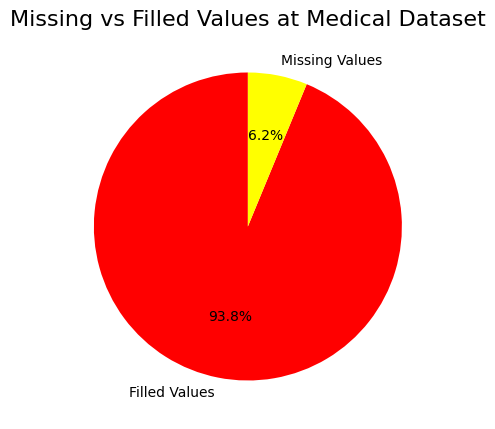

In [ ]:
from textwrap import fill
import matplotlib.pyplot as plt  # Menambahkan import untuk matplotlib.pyplot

# Counting total missing values and filled values
total_values = df.size
missing_values_total = df.isnull().sum().sum()
filled_values_total = total_values - missing_values_total

# Chart Visualization
plt.figure(figsize=(5, 5))
plt.pie([filled_values_total, missing_values_total],
         labels=['Filled Values', 'Missing Values'],
         colors=['red', 'yellow'],
         autopct='%1.1f%%',
         startangle=90)
plt.title('Missing vs Filled Values at Medical Dataset', fontsize=16)
plt.show()



In [ ]:
total_rows = len(data)
total_rows

for column in data.columns:
  missing_count = data[column].isnull().sum()
  missing_percentage = (missing_count / total_rows) * 100
  print(f"Column: {column}, Missing Count: {missing_count}, Missing Percentage: {missing_percentage:.2f}%")

Column: id, Missing Count: 0, Missing Percentage: 0.00%
Column: full_name, Missing Count: 0, Missing Percentage: 0.00%
Column: age, Missing Count: 381, Missing Percentage: 18.86%
Column: gender, Missing Count: 0, Missing Percentage: 0.00%
Column: smoking_status, Missing Count: 0, Missing Percentage: 0.00%
Column: glucose_levels, Missing Count: 501, Missing Percentage: 24.80%
Column: condition, Missing Count: 0, Missing Percentage: 0.00%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2020 non-null   int64  
 1   full_name       2020 non-null   object 
 2   age             1639 non-null   float64
 3   gender          2020 non-null   int64  
 4   smoking_status  2020 non-null   int64  
 5   glucose_levels  1519 non-null   float64
 6   condition       2020 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 110.6+ KB


In [ ]:
data['age'].dtype

dtype('float64')

In [ ]:
data['age'].mode()[0]

np.float64(39.0)

In [ ]:
data['age'].median()

50.0

In [ ]:
# Handling missing value for EDA, without splitting
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].median())

To handle missing values automatically based on their data type:

- Object/Category → fill with the mode
- Numeric → fill with the median

This way, the data becomes clean and ready for analysis.

In [ ]:
data.isna().sum()

,0
id,0
full_name,0
age,0
gender,0
smoking_status,0
glucose_levels,0
condition,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2020 non-null   int64  
 1   full_name       2020 non-null   object 
 2   age             2020 non-null   float64
 3   gender          2020 non-null   int64  
 4   smoking_status  2020 non-null   int64  
 5   glucose_levels  2020 non-null   float64
 6   condition       2020 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 110.6+ KB


# **Explatory Data Analysis - EDA**

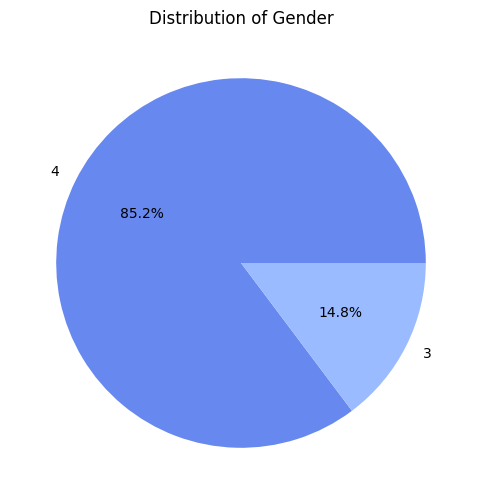

In [ ]:
# Pie chart for the distribution of gender with automatic colors
gender_counts = df['gender'].value_counts()
colors = sns.color_palette('coolwarm')[:len(gender_counts)]

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Gender')
plt.ylabel('')
plt.show()

**Gender Distribution of Medical Patients**

The pie chart above illustrates the distribution of gender among the patients pf medical. In this dataset:

- The value **3 represents female** patients  
- The value **4 represents male** patients

From the chart, we can see that:

- **14.8%** of the patients were **female (3)**
- **85.2%** of the patients were **male (4)**

This indicates that there were more male patients than female patients of medical.


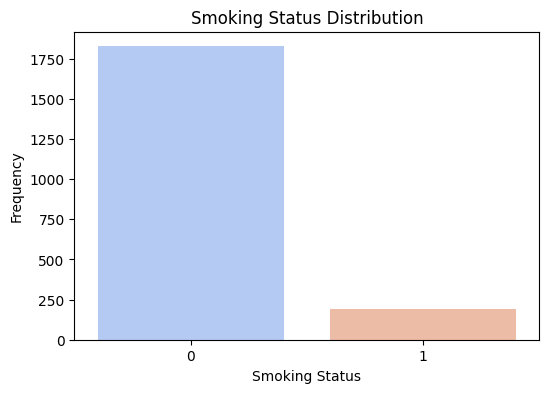

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking_status', hue='smoking_status', data=df, palette='coolwarm', legend=False)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.show()

**Smoking Status Distribution of Medical Patients**

The bar chart above illustrates the smoking status distribution of medical patients. In this dataset:

- The value **0 represents patients who non smoker**  
- The value **1 represents patients who smoker**

From the chart, we can observe that:

- A slightly higher number of passengers ** smoker (1)** compared to those who **non smoker (0)**
- There were approximately ** 192 smokers** and around **1828 non smokers**

This indicates that while the number of non smokers was slightly greater.

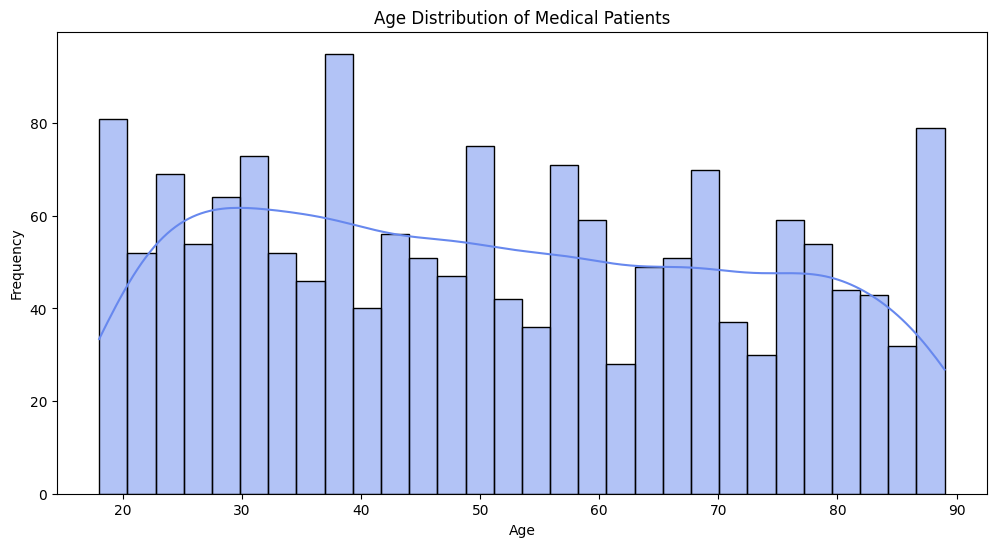

In [ ]:
plt.figure(figsize=(12, 6))
color = sns.color_palette('coolwarm')[0]  # Take the first color from the coolwarm palette
sns.histplot(df['age'].dropna(), kde=True, bins=30, color=color)
plt.title('Age Distribution of Medical Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Age Distribution of Medical Patients
The chart on the side showing the age ditribution of the medical patients. From that chart, can coclude that:
*   Most patients were between **30 until 80 years old**, with the highest frequensy around the **35** years old.
*   There were also a number of very young patients, even below the age of **18**, the although they were fewer than thos in the young adult age group.

This distribution suggests that the majority of medical patients were in their productive or young adult age.



### **Correlation Matrix**

The matrix below shows the correlation between pairs of variables. Correlation coefficients range from -1 to 1, indicating the strength and direction of the linear relationship between two variables:

- **+1**: A perfect positive correlation, meaning that as one variable increases, the other increases proportionally.  
- **0**: No linear correlation between the variables, suggesting that changes in one variable do not predict changes in the other.  
- **-1**: A perfect negative correlation, meaning that as one variable increases, the other decreases proportionally.

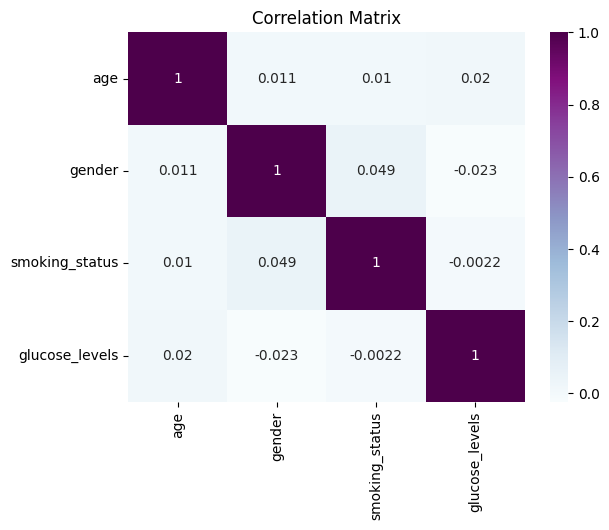

In [ ]:
corr_matrix = df.drop(columns=['id']).corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix above, there is a **strong negative correlation** between **gender** and **smoking status**, with a coefficient of **0.049**. This suggests that **gender had a insignificant impact on smoking status chances**.


Additionally, the value of **1** in the matrix represents a **perfect correlation of a variable with itself** — such as **`smoking status` with `smoking status`** or **`age` with `age`**. This is standard in any correlation matrix, as each variable is always perfectly correlated with itself.

# Thank you :))